In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [11]:
marathon = pd.read_csv("../data/marathon_results_2017.csv", 
                       usecols=["Age","M/F","Country","40K"])

marathon["40K"] = marathon["40K"].apply(pd.to_timedelta, errors="coerce")

marathon["TimeSeconds"] = marathon["40K"].apply(lambda x: x.total_seconds())
marathon.head()

,Age,M/F,Country,40K,TimeSeconds
0,24,M,KEN,0 days 02:02:53,7373.0
1,30,M,USA,0 days 02:03:14,7394.0
2,25,M,JPN,0 days 02:03:38,7418.0
3,32,M,USA,0 days 02:04:35,7475.0
4,31,M,KEN,0 days 02:05:00,7500.0


<Axes: xlabel='Age', ylabel='TimeSeconds'>

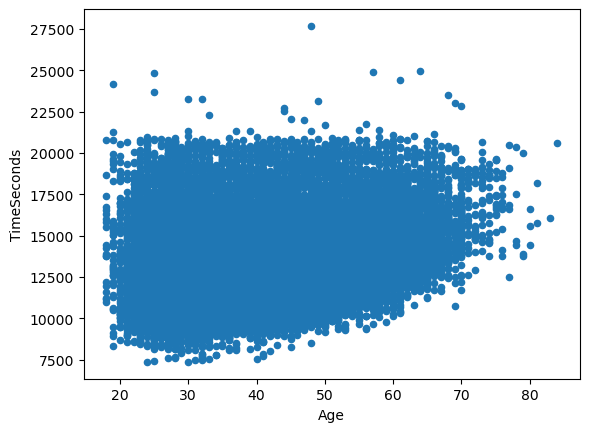

In [13]:
marathon.plot.scatter(x = 'Age',
                      y = 'TimeSeconds')

In [15]:
mFilter = marathon['M/F'] == 'M'
fFilter = marathon['M/F'] == 'F'
marathon_m = marathon[mFilter]
marathon_f = marathon[fFilter]

In [16]:
marathon_m

,Age,M/F,Country,40K,TimeSeconds
0,24,M,KEN,0 days 02:02:53,7373.0
1,30,M,USA,0 days 02:03:14,7394.0
2,25,M,JPN,0 days 02:03:38,7418.0
3,32,M,USA,0 days 02:04:35,7475.0
4,31,M,KEN,0 days 02:05:00,7500.0
...,...,...,...,...,...
26403,25,M,USA,0 days 06:34:28,23668.0
26404,19,M,USA,0 days 06:42:51,24171.0
26406,25,M,USA,0 days 06:54:21,24861.0
26408,64,M,USA,0 days 06:56:08,24968.0


In [17]:
marathon_f

,Age,M/F,Country,40K,TimeSeconds
20,37,F,KEN,0 days 02:14:43,8083.0
23,27,F,BRN,0 days 02:15:42,8142.0
24,25,F,USA,0 days 02:15:54,8154.0
33,33,F,USA,0 days 02:17:25,8245.0
43,33,F,KEN,0 days 02:19:07,8347.0
...,...,...,...,...,...
26385,37,F,USA,0 days 05:55:05,21305.0
26396,44,F,USA,0 days 06:18:21,22701.0
26399,49,F,USA,0 days 06:25:56,23156.0
26405,61,F,USA,0 days 06:46:57,24417.0


<Axes: xlabel='Age', ylabel='TimeSeconds'>

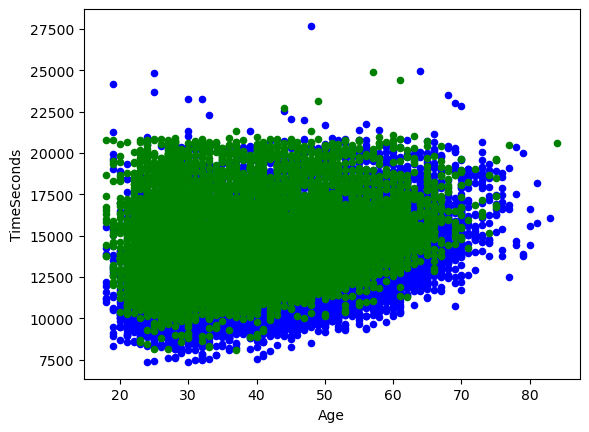

In [19]:
ax = marathon_m.plot.scatter(x = 'Age', y = 'TimeSeconds', color='blue')
marathon_f.plot.scatter(x = 'Age', y = 'TimeSeconds', color='green', ax=ax)

<Axes: xlabel='Age', ylabel='TimeSeconds'>

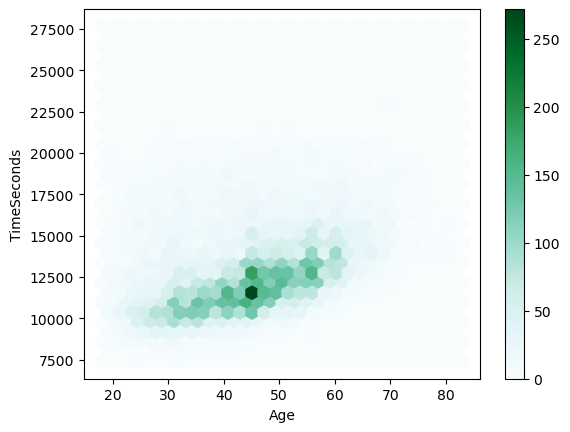

In [31]:
marathon_m.plot.hexbin(x = 'Age', y = 'TimeSeconds', gridsize = 30)

<Axes: xlabel='Age', ylabel='TimeSeconds'>

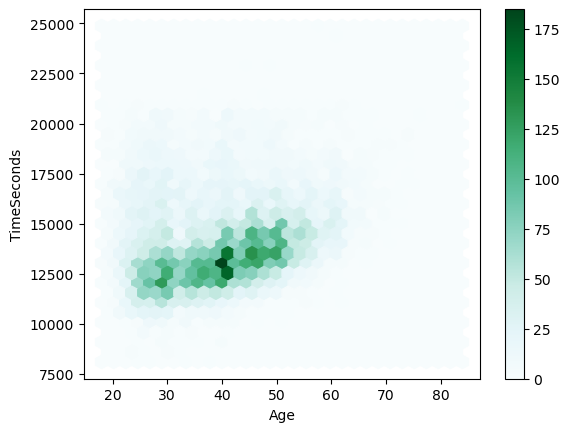

In [30]:
marathon_f.plot.hexbin(x = 'Age', y = 'TimeSeconds', gridsize = 30)

In [45]:
import datetime
#Import data
nasa = pd.read_csv("../data/nasa_facebook_statuses.csv", 
                   usecols=["status_published","num_likes"])
#Convert column type to date time
nasa["status_published"] = pd.to_datetime(nasa["status_published"])
#Select observations between two datetimes - May 2015
filter =(nasa['status_published'] >= '2016-5-1') & (nasa['status_published'] < '2016-6-1')
nasa = nasa[filter]
#Add column with day only
nasa['day'] = nasa.apply(lambda row: row["status_published"].day,axis=1)
#Remove non-numeric column
nasa.drop('status_published', axis=1, inplace=True)
#Group all columns by sum
nasa_by_day = nasa.groupby(by='day').sum()

#Import data
bean = pd.read_csv("../data/mrbean_facebook_statuses.csv",
usecols=["status_published","num_likes"])
#Convert column type to date time
bean["status_published"] = pd.to_datetime(bean["status_published"])

#Select observations between two datetimes - May 2015
filter =(bean['status_published'] >= '2016-5-1') & (bean['status_published'] < '2016-6-1')
bean = bean[filter]
#Add column with day only
bean['day'] = bean.apply(lambda row: row["status_published"].day,axis=1)
bean.drop('status_published', axis=1, inplace=True)
#Group all columns by sum
bean_by_day = bean.groupby(by='day').sum()
days = pd.concat([nasa["day"], (bean["day"])])
days = days.unique()
fb = pd.DataFrame(index=days).sort_index()
fb['nasa'] = nasa_by_day["num_likes"]
fb['bean'] = bean_by_day["num_likes"]
fb.fillna(value=0, inplace=True)
fb.head()


,nasa,bean
1,60243,0.0
2,177989,0.0
3,50264,0.0
4,133302,26821.0
5,89657,0.0


<Axes: >

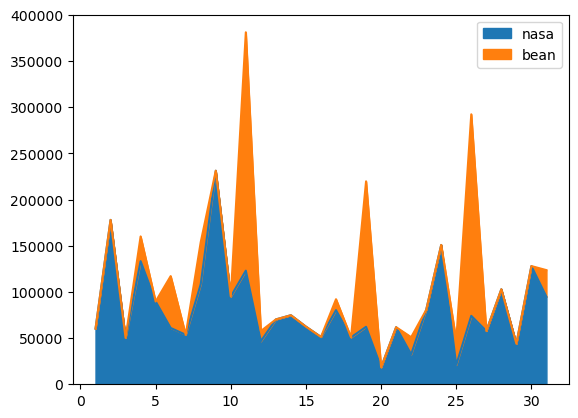

In [46]:
fb.plot.area()